# `ALL`: Identifying Adverbs with Strongest Negative Environment Associations

In [78]:
from math import sqrt

from am_notebooks import *

from source.utils import colors
from source.utils.associate import TOP_AM_DIR
from source.utils.dataframes import transform_counts
from source.utils.general import confirm_dir

DATE=timestamp_today()
SET_FLOOR = 2000
# MIR_FLOOR = min(round(SET_FLOOR//15, -2), 500)
MIR_FLOOR = 200
K = 8
# * 👇 adjust verbosity
VERBOSE = True
TAG='ALL'
TOP_AM_TAG_DIR = TOP_AM_DIR / TAG
confirm_dir(TOP_AM_TAG_DIR)
METRIC_PRIORITIES = METRIC_PRIORITY_DICT[TAG]
METRIC_PRI_2 = METRIC_PRIORITIES[:2]
data_top = f'{TAG}-Top{K}'
OUT_DIR = TOP_AM_TAG_DIR / data_top
confirm_dir(OUT_DIR)
METRIC_PRIORITIES = METRIC_PRIORITY_DICT[TAG]
parameters = {
    '`SET_FLOOR`': {
        'value': f'${SET_FLOOR:,}$',
        'description': '_`*direct` superset minimum `env~adv` co-occurence_',
    },
    '`MIR_FLOOR`': {
        'value': f'${MIR_FLOOR:,}$',
        'description': '_`*mirror` subset minimum `env~adv` co-occurence_',
    },
    '`TAG`': {
        'value': f'`"{TAG}"`',
        'description': '_frequency data evaluated_',
    },
    '`K`': {
        'value': f'${K}$',
        'description': '_# top adverbs sought_',
    },
    '`OUT_DIR`': {
        'value': f'`{OUT_DIR}/`',
        'description': '_output directory_',
    },
    '`DATE`': {
        'value': DATE,
        'description': '_date of processing_',
    }
}
save_prefix=f'{data_top}_NEG-ADV_combined-{SET_FLOOR}'
combined_top_csv_output = OUT_DIR / f'{save_prefix}.{timestamp_today()}.csv'
# nb_show_table(pd.DataFrame(parameters, dtype='string').T)


|                 | `value`                                                       | `description`                                         |
|:----------------|:--------------------------------------------------------------|:------------------------------------------------------|
| **`SET_FLOOR`** | $5,000$                                                       | *_`*direct` superset minimum `env~adv` co-occurence_* |
| **`MIR_FLOOR`** | $500$                                                         | *_`*mirror` subset minimum `env~adv` co-occurence_*   |
| **`TAG`**       | `"ALL"`                                                       | *_frequency data evaluated_*                          |
| **`K`**         | $8$                                                           | *_# top adverbs sought_*                              |
| **`OUT_DIR`**   | `/share/compling/projects/sanpi/results/top_AM/ALL/ALL-Top8/` | *_output directory_*                                  |
| **`DATE`**      | 2024-08-05                                                    | *_date of processing_*                                |


Set columns and diplay settings

In [79]:
FOCUS = FOCUS_DICT[TAG]['polar']
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', 90)
pd.set_option("display.precision", 2)
pd.set_option("styler.format.precision", 2)
pd.set_option("styler.format.thousands", ",")
pd.set_option("display.float_format", '{:,.1f}'.format)

## Set paths and load adverb association tables

In [80]:
try:
    adv_am_paths = locate_polar_am_paths(superset_floor=SET_FLOOR,
                                         mirror_floor=MIR_FLOOR)
except Exception:
    MIR_FLOOR = 100
    adv_am_paths = locate_polar_am_paths(superset_floor=SET_FLOOR,
                                         mirror_floor=MIR_FLOOR)

setdiff_adv = adjust_am_names(filter_load_adx_am(adv_am_paths['RBdirect'], column_list=FOCUS))
mirror_adv = adjust_am_names(filter_load_adx_am(adv_am_paths['mirror'], column_list=FOCUS))

{'RBdirect': '*ALL*min2000x*parq', 'mirror': '*ALL*min200x*parq'}
╒══════════╤══════════════════════════════════════════════════════════════════════════╕
│          │ path to selected AM dataframe                                            │
╞══════════╪══════════════════════════════════════════════════════════════════════════╡
│ RBdirect │ /share/compling/projects/sanpi/results/assoc_df/polar/RBdirect/adv/extra │
│          │ /polarized-adv_ALL-direct_min2000x_extra.parq                            │
├──────────┼──────────────────────────────────────────────────────────────────────────┤
│ mirror   │ /share/compling/projects/sanpi/results/assoc_df/polar/mirror/adv/extra/p │
│          │ olarized-adv_ALL-mirror_min200x_extra.parq                               │
╘══════════╧══════════════════════════════════════════════════════════════════════════╛


In [81]:
if VERBOSE:
    print(r'### Sample of Superset `RBdirect` $*E\sim\texttt{adv}$ AMs', 
        f'With $f\geq{SET_FLOOR:,}$ (i.e. `adv` occurs in given environment at least {SET_FLOOR:,} times)',
        sep='\n\n', end = '\n\n')
    nb_show_table(setdiff_adv.sample(min(6,K)).sort_values('unexp_r', ascending=False))

### Sample of Superset `RBdirect` $*E\sim\texttt{adv}$ AMs

With $f\geq2,000$ (i.e. `adv` occurs in given environment at least 2,000 times)


|                       |    `f` |   `dP1` |   `LRC` |   `P1` |     `G2` | `l1`       | `l2`          |       `f1` |   `f2` |        `N` |   `exp_f` |   `unexp_f` |   `unexp_r` |
|:----------------------|-------:|--------:|--------:|-------:|---------:|:-----------|:--------------|-----------:|-------:|-----------:|----------:|------------:|------------:|
| **NEGany~legally**    |  3,213 |    0.06 |    1.12 |   0.10 | 1,777.37 | NEGATED    | legally       |  3,173,681 | 32,126 | 71,961,373 |  1,416.84 |    1,796.16 |        0.56 |
| **COM~progressively** | 12,336 |    0.04 |    3.66 |   1.00 |   989.82 | COMPLEMENT | progressively | 68,787,692 | 12,349 | 71,961,373 | 11,804.38 |      531.62 |        0.04 |
| **COM~however**       | 55,157 |    0.04 |    2.69 |   0.99 | 3,162.13 | COMPLEMENT | however       | 68,787,692 | 55,447 | 71,961,373 | 53,

### Sample of Superset `RBdirect` $*E\sim\texttt{adv}$ AMs

With $f\geq2,000$ (i.e. `adv` occurs in given environment at least 2,000 times)


|                    |       `f` |   `dP1` |   `LRC` |   `P1` |       `G2` | `l1`       | `l2`       |       `f1` |      `f2` |        `N` |      `exp_f` |   `unexp_f` |   `unexp_r` |
|:-------------------|----------:|--------:|--------:|-------:|-----------:|:-----------|:-----------|-----------:|----------:|-----------:|-------------:|------------:|------------:|
| **COM~remarkably** |    68,396 |    0.04 |    3.34 |   1.00 |   4,585.09 | COMPLEMENT | remarkably | 68,787,692 |    68,615 | 71,961,373 |    65,588.90 |    2,807.10 |        0.04 |
| **COM~enormously** |    24,735 |    0.04 |    2.19 |   0.99 |   1,269.66 | COMPLEMENT | enormously | 68,787,692 |    24,902 | 71,961,373 |    23,803.76 |      931.24 |        0.04 |
| **COM~internally** |     2,903 |    0.01 |    0.00 |   0.96 |       2.70 | COMPLEMENT | internally | 68,787,692 |     3,018 | 71,961,373 |     2,884.90 |       18.10 |        0.01 |
| **COM~so**         | 4,829,392 |   -0.02 |   -0.61 |   0.93 | -58,502.51 | COMPLEMENT | so         | 68,787,692 | 5,173,538 | 71,961,373 | 4,945,371.71 | -115,979.71 |       -0.02 |
| **COM~directly**   |    40,483 |   -0.12 |   -2.04 |   0.83 | -10,698.67 | COMPLEMENT | directly   | 68,787,692 |    48,680 | 71,961,373 |    46,533.09 |   -6,050.09 |       -0.15 |
| **NEGany~often**   |     2,270 |   -0.04 |   -2.49 |   0.01 | -15,324.08 | NEGATED    | often      |  3,173,681 |   312,584 | 71,961,373 |    13,785.76 |  -11,515.76 |       -5.07 |



In [82]:
if VERBOSE:
    print(r'### Sample of Subset `mirror` $@E\sim\texttt{adv}$ AMs', 
        f'With $f\geq{MIR_FLOOR:,}$ (i.e. `adv` occurs in given environment at least {MIR_FLOOR:,} times)',
        sep='\n\n', end = '\n')
    nb_show_table(mirror_adv.sample(min(6,K)).sort_values('unexp_r', ascending=False))

### Sample of Subset `mirror` $@E\sim\texttt{adv}$ AMs

With $f\geq200$ (i.e. `adv` occurs in given environment at least 200 times)

|                         |   `f` |   `dP1` |   `LRC` |   `P1` |   `G2` | `l1`   | `l2`            |      `f1` |   `f2` |       `N` |   `exp_f` |   `unexp_f` |   `unexp_r` |
|:------------------------|------:|--------:|--------:|-------:|-------:|:-------|:----------------|----------:|-------:|----------:|----------:|------------:|------------:|
| **NEGmir~physically**   |   497 |    0.05 |    0.05 |   0.22 |  32.12 | NEGMIR | physically      |   291,735 |  2,257 | 1,680,633 |    391.78 |      105.22 |        0.21 |
| **POS~eerily**          |   399 |    0.17 |    1.98 |   1.00 | 133.98 | POSMIR | eerily          | 1,388,898 |    401 | 1,680,633 |    331.39 |       67.61 |        0.17 |
| **POS~supremely**       |   282 |    0.14 |    0.56 |   0.96 |  52.27 | POSMIR | supremely       | 1,388,898 |    293 | 1,680,633 |    242.14 |       39.86 |        0.14

### Sample of Subset `mirror` $@E\sim\texttt{adv}$ AMs

With $f\geq200$ (i.e. `adv` occurs in given environment at least 200 times)

|                     |   `f` |   `dP1` |   `LRC` |   `P1` |       `G2` | `l1`   | `l2`        |      `f1` |    `f2` |       `N` |   `exp_f` |   `unexp_f` |   `unexp_r` |
|:--------------------|------:|--------:|--------:|-------:|-----------:|:-------|:------------|----------:|--------:|----------:|----------:|------------:|------------:|
| **POS~undeniably**  |   614 |    0.16 |    2.11 |   0.99 |     187.59 | POSMIR | undeniably  | 1,388,898 |     620 | 1,680,633 |    512.38 |      101.62 |        0.17 |
| **POS~oddly**       |   723 |    0.16 |    2.18 |   0.99 |     215.62 | POSMIR | oddly       | 1,388,898 |     731 | 1,680,633 |    604.11 |      118.89 |        0.16 |
| **POS~greatly**     |   203 |    0.07 |    0.00 |   0.89 |       8.24 | POSMIR | greatly     | 1,388,898 |     227 | 1,680,633 |    187.60 |       15.40 |        0.08 |
| **POS~half**        |   956 |    0.06 |    0.00 |   0.88 |      26.44 | POSMIR | half        | 1,388,898 |   1,083 | 1,680,633 |    895.01 |       60.99 |        0.06 |
| **POS~immediately** |   780 |   -0.17 |   -0.84 |   0.66 |    -191.24 | POSMIR | immediately | 1,388,898 |   1,183 | 1,680,633 |    977.65 |     -197.65 |       -0.25 |
| **NEGmir~very**     | 8,914 |   -0.14 |   -1.97 |   0.05 | -29,010.27 | NEGMIR | very        |   291,735 | 183,918 | 1,680,633 | 31,925.66 |  -23,011.66 |       -2.58 |



## Calculate "Most Negative" Adverbs for each Polarity Approximation

In [83]:
METRIC_PRI_2 = METRIC_PRIORITIES[:2]
if VERBOSE:
    md_frame_code('''nb_show_table(
        pd.concat([setdiff_adv.filter(METRIC_PRI_2).sample(5),
                mirror_adv.filter(METRIC_PRI_2).sample(5)]
        ).sort_values(METRIC_PRI_2, ascending=False))''')
    nb_show_table(
        pd.concat([setdiff_adv.filter(METRIC_PRI_2).sample(5),
                mirror_adv.filter(METRIC_PRI_2).sample(5)]
        ).sort_values(METRIC_PRI_2, ascending=False))


```python
nb_show_table(
        pd.concat([setdiff_adv.filter(METRIC_PRI_2).sample(5),
                mirror_adv.filter(METRIC_PRI_2).sample(5)]
        ).sort_values(METRIC_PRI_2, ascending=False))
```


|                     |   `dP1` |   `LRC` |
|:--------------------|--------:|--------:|
| **NEGmir~not**      |    0.83 |    8.76 |
| **POS~decidedly**   |    0.16 |    2.02 |
| **POS~both**        |    0.13 |    1.29 |
| **POS~drastically** |    0.09 |    0.04 |
| **COM~wonderfully** |    0.04 |    3.88 |
| **COM~quietly**     |    0.04 |    2.60 |
| **COM~adorably**    |    0.04 |    1.04 |
| **COM~openly**      |    0.03 |    1.01 |
| **NEGmir~purely**   |   -0.02 |    0.00 |
| **COM~there**       |   -0.03 |   -0.35 |




```python
nb_show_table(
        pd.concat([setdiff_adv.filter(METRIC_PRI_2).sample(5),
                mirror_adv.filter(METRIC_PRI_2).sample(5)]
        ).sort_values(METRIC_PRI_2, ascending=False))
```


|                        |   `dP1` |   `LRC` |
|:-----------------------|--------:|--------:|
| **NEGmir~before**      |    0.82 |    6.19 |
| **POS~maybe**          |    0.17 |    4.00 |
| **POS~simultaneously** |    0.11 |    0.00 |
| **COM~lot**            |    0.04 |    2.10 |
| **COM~momentarily**    |    0.04 |    1.46 |
| **COM~nonetheless**    |    0.04 |    2.19 |
| **COM~dreadfully**     |    0.03 |    0.43 |
| **POS~factually**      |    0.01 |    0.00 |
| **NEGany~incredibly**  |   -0.04 |   -2.72 |
| **POS~exactly**        |   -0.62 |   -3.61 |



Top `env~adv` associations across the board, without controlling for polarity are determined by: 
- 1st and 2nd priority metrics based on comparison space (`dP1` for `ALL`, but `P1` for `NEQ`, & `LRC` for both)
- (trivial, but just in case) `LRC.round(1) >= 1` only: only values with a positive LRC value exceeding 1 (when rounded to )
- top `k` (default: 10) values for each
  > There can be anywhere from `k` to `k*2` (e.g. 10-20) different "top" association pairs, 
  >   depending on how much corroboration there is between the priority metrics.
  > In the case where the top `k` values are identical (though potentially different orderings), 
  >   there will be **`k`** total (e.g. 10). 
  > However, if there is zero corroberation---non-overlapping selections---there will be *`k*2`* values (e.g. 20).

In [84]:
def show_top_any_env(adv_df: pd.DataFrame, save_path: Path = None, k: int = 10) -> None:
    _top = get_top_vals(adjust_am_names(adv_df),
                        k=k, index_like=None,
                        metric_filter=METRIC_PRI_2)
    is_super = 'COMPLEMENT' in adv_df.l1.unique()
    space = f'{TAG}+{"sup" if is_super else "mir"}'
    _top = _top.assign(space=space, space_key=space +
                       ':' + _top.index.astype('string'))
    _top = _top.reset_index().set_index('space_key')
    col_order = ['key', 'space', 'l1', 'l2', 'dP1', 'LRC', 'P1', 'G2',
                 'f', 'f1', 'f2', 'N', 'exp_f', 'unexp_f', 'unexp_r']

    print((f'### {k}-{k*2} Most Strongly Associated Environment~Adverb Pairs for '
           f'<u>{TAG} _{"superset" if is_super else "mirror subset"}_</u> data\n'),
          '"'+('_Absent Negative_' if is_super else '_Present Positive_') +
          '" approximation',
          f'selected and ranked by  {", then ".join([f"`{m}`" for m in METRIC_PRI_2])}',
          sep='\n+ ')
    if save_path:
        if k != K:
            save_path = save_path.with_name(
                save_path.name.replace(str(K), str(k)))
        _md_path = save_path if save_path.suffix == '.md' else save_path.with_suffix(
            '.md')
        _csv_stem = save_path.stem.replace(
            f'{TAG}-', '').replace(f'{"super" if is_super else "mirror"}-', '')
        _csv_path = save_path.parent.parent.parent.joinpath(
            _csv_stem).with_suffix('.csv')
        nb_show_table(_top.reset_index()
                      .filter(items=['key', 'adv', 'l1'] + adjust_am_names(FOCUS))
                      .sort_values(METRIC_PRI_2, ascending=False),
                      outpath=_md_path)
        if _csv_path.is_file() and space not in pd.read_csv(_csv_path, usecols=['space']).squeeze().unique():
            print(pd.read_csv(_csv_path, usecols=['space']).squeeze().unique())
            _mode = 'a'
            _header = False
        else:
            _mode = 'w'
            _header = True
        _top[col_order].to_csv(_csv_path, mode=_mode, header=_header)
        print(f'\n> full table saved [{_mode}] to:  \n> `{_csv_path}`\n')

    _top_combined = (
        _top.drop_duplicates()
        .sort_values(METRIC_PRI_2, ascending=False)
    )
    nb_show_table(
        _top_combined.reset_index()
        .filter(['l2', 'l1']+METRIC_PRI_2
                + ['dP1', 'P1', 'G2', 'unexp_r',
                   'unexp_f', 'exp_f', 'f', 'f2']))
    #   results/top_AM/NEQ/NEQ-Top8/NEQ-Top8_POS-ADV_combined-5000.2024-08-05.csv
    return _top_combined


In [85]:
tops = dict()
for k in sorted({K, 3, 10, 20, 50, 75, 99,200}):
    for adv_df in (setdiff_adv, mirror_adv):
        category = 'super' if 'COMPLEMENT' in adv_df.l1.unique() else 'mirror'
        tops[f'{category}{k}'] = show_top_any_env(
            adjust_am_names(adv_df.convert_dtypes()).filter(
                adjust_am_names(FOCUS)),
            k=k,
            save_path=combined_top_csv_output.with_name(
                combined_top_csv_output.name.replace('NEG', 'ANY')
                .replace('combined', category)))

### 3-6 Most Strongly Associated Environment~Adverb Pairs for <u>ALL _superset_</u> data

+ "_Absent Negative_" approximation
+ selected and ranked by  `dP1`, then `LRC`



|       | `key`              | `l1`       |     `f` |   `dP1` |   `LRC` |   `P1` |       `G2` | `l2`         |       `f1` |    `f2` |        `N` |    `exp_f` |   `unexp_f` |   `unexp_r` |
|:------|:-------------------|:-----------|--------:|--------:|--------:|-------:|-----------:|:-------------|-----------:|--------:|-----------:|-----------:|------------:|------------:|
| **1** | NEGany~necessarily | NEGATED    |  42,595 |    0.83 |    7.15 |   0.88 | 230,465.59 | necessarily  |  3,173,681 |  48,641 | 71,961,373 |   2,145.19 |   40,449.81 |        0.95 |
| **2** | NEGany~that        | NEGATED    | 164,768 |    0.75 |    6.37 |   0.80 | 831,669.72 | that         |  3,173,681 | 206,801 | 71,961,373 |   9,120.45 |  155,647.55 |        0.94 |
| **3** | NEGany~exactly     | NEGATED    |  43,813 |    0.74 |    6.19 |   0.78 | 216,169.98 | exactly      |  3,173,681 |  56,109 | 71,961,373 |   2,474.55 |   41,338.45 |        0.94 |
| **4** | COM~increasingly   | COMPLEMENT | 373,560 |    0.

### 10-20 Most Strongly Associated Environment~Adverb Pairs for <u>ALL _superset_</u> data

+ "_Absent Negative_" approximation
+ selected and ranked by  `dP1`, then `LRC`

|        | `l2`         | `l1`       | `dP1` | `LRC` |       `G2` | `P1` | `unexp_r` |  `unexp_f` |     `f` |    `f2` |
|:-------|:-------------|:-----------|------:|------:|-----------:|-----:|----------:|-----------:|--------:|--------:|
| **1**  | necessarily  | NEGATED    |  0.83 |  7.15 | 230,465.59 | 0.88 |      0.95 |  40,449.81 |  42,595 |  48,641 |
| **2**  | that         | NEGATED    |  0.75 |  6.37 | 831,669.72 | 0.80 |      0.94 | 155,647.55 | 164,768 | 206,801 |
| **3**  | exactly      | NEGATED    |  0.74 |  6.19 | 216,169.98 | 0.78 |      0.94 |  41,338.45 |  43,813 |  56,109 |
| **4**  | immediately  | NEGATED    |  0.57 |  5.04 | 231,721.98 | 0.61 |      0.93 |  52,052.77 |  56,099 |  91,746 |
| **5**  | yet          | NEGATED    |  0.50 |  4.66 | 197,895.38 | 0.55 |      0.92 |  47,688.06 |  51,867 |  94,755 |
| **6**  | any          | NEGATED    |  0.43 |  4.22 |  53,087.82 | 0.48 |      0.91 |  13,965.62 |  15,384 |  32,161 |
| **7**  | remotely     | NEGATED    |  0.32 |  3.52 |  15,974.28 | 0.37 |      0.88 |   4,982.09 |   5,661 |  15,394 |
| **8**  | terribly     | NEGATED    |  0.26 |  3.19 |  43,629.29 | 0.31 |      0.86 |  15,367.72 |  17,949 |  58,529 |
| **9**  | only         | NEGATED    |  0.22 |  2.92 | 242,355.41 | 0.26 |      0.83 |  94,422.70 | 113,502 | 432,612 |
| **10** | overly       | NEGATED    |  0.20 |  2.77 |  49,011.01 | 0.25 |      0.82 |  20,206.27 |  24,613 |  99,920 |
| **11** | increasingly | COMPLEMENT |  0.04 |  7.04 |  32,850.41 | 1.00 |      0.04 |  16,405.17 | 373,560 | 373,633 |
| **12** | relatively   | COMPLEMENT |  0.04 |  5.98 |  49,292.09 | 1.00 |      0.04 |  25,366.58 | 582,065 | 582,383 |
| **13** | almost       | COMPLEMENT |  0.04 |  5.27 |  35,325.48 | 1.00 |      0.04 |  18,726.18 | 433,210 | 433,607 |
| **14** | mostly       | COMPLEMENT |  0.04 |  5.10 |  16,237.07 | 1.00 |      0.04 |   8,623.22 | 199,493 | 199,676 |
| **15** | seemingly    | COMPLEMENT |  0.04 |  5.04 |  13,017.97 | 1.00 |      0.04 |   6,916.38 | 160,011 | 160,158 |
| **16** | fairly       | COMPLEMENT |  0.04 |  4.99 |  29,631.19 | 1.00 |      0.04 |  15,950.56 | 370,708 | 371,125 |

### 10-20 Most Strongly Associated Environment~Adverb Pairs for <u>ALL _mirror subset_</u> data

+ "_Present Positive_" approximation
+ selected and ranked by  `dP1`, then `LRC`

|        | `l2`         | `l1`   | `dP1` | `LRC` |      `G2` | `P1` | `unexp_r` | `unexp_f` |    `f` |   `f2` |
|:-------|:-------------|:-------|------:|------:|----------:|-----:|----------:|----------:|-------:|-------:|
| **1**  | ever         | NEGMIR |  0.76 |  5.67 | 14,226.71 | 0.93 |      0.81 |  3,833.78 |  4,709 |  5,042 |
| **2**  | any          | NEGMIR |  0.74 |  4.91 |  3,078.62 | 0.91 |      0.81 |    863.08 |  1,066 |  1,169 |
| **3**  | longer       | NEGMIR |  0.73 |  4.69 |  2,328.22 | 0.90 |      0.81 |    663.04 |    821 |    910 |
| **4**  | necessarily  | NEGMIR |  0.71 |  4.50 |  2,631.06 | 0.88 |      0.80 |    773.44 |    963 |  1,092 |
| **5**  | remotely     | NEGMIR |  0.62 |  3.84 |  4,286.74 | 0.80 |      0.78 |  1,438.32 |  1,840 |  2,314 |
| **6**  | that         | NEGMIR |  0.62 |  3.91 |  9,933.37 | 0.79 |      0.78 |  3,359.35 |  4,308 |  5,465 |
| **7**  | exactly      | NEGMIR |  0.62 |  3.61 |  1,868.34 | 0.79 |      0.78 |    634.03 |    813 |  1,031 |
| **8**  | particularly | NEGMIR |  0.54 |  3.43 | 18,490.40 | 0.71 |      0.76 |  6,995.75 |  9,243 | 12,946 |
| **9**  | inherently   | NEGMIR |  0.39 |  2.40 |  3,906.56 | 0.56 |      0.69 |  1,978.71 |  2,864 |  5,100 |
| **10** | especially   | NEGMIR |  0.23 |  1.44 |  1,127.11 | 0.40 |      0.57 |    891.15 |  1,569 |  3,905 |
| **11** | pretty       | POSMIR |  0.17 |  4.73 |  8,277.42 | 0.99 |      0.17 |  4,152.25 | 24,525 | 24,652 |
| **12** | plain        | POSMIR |  0.17 |  4.45 |  1,751.25 | 1.00 |      0.17 |    858.22 |  5,025 |  5,042 |
| **13** | rather       | POSMIR |  0.17 |  4.63 |  2,889.54 | 1.00 |      0.17 |  1,425.43 |  8,364 |  8,396 |
| **14** | somewhat     | POSMIR |  0.17 |  4.33 |  1,552.53 | 1.00 |      0.17 |    763.58 |  4,475 |  4,491 |
| **15** | fairly       | POSMIR |  0.17 |  4.33 |  1,936.22 | 1.00 |      0.17 |    962.84 |  5,661 |  5,685 |
| **16** | otherwise    | POSMIR |  0.17 |  4.04 |  2,179.49 | 0.99 |      0.17 |  1,120.16 |  6,653 |  6,695 |

In [86]:
def quick_show_top(label, top_df):
    label = ('r: Top '.join(label.rsplit('r', maxsplit=1)) 
             + f' [of each metric, {"d" if TAG == "ALL" else ""}P1 & LRC]')
    nb_show_table(top_df.head(min(16,len(top_df)))
        .filter(['l2', 'l1']+METRIC_PRI_2
                + ['dP1', 'P1', 'G2', 
                   'unexp_r', 'unexp_f', 'exp_f', 'f', 'f2']).reset_index(),
        n_dec=1, title='\n### ' + label + '\n')
    return top_df.describe()

superK = f'super{K}'
mirrorK = f'mirror{K}'
quick_show_top(superK, tops[superK])


### super: Top 8 [of each metric, dP1 & LRC]

|        | `space_key`                | `l2`         | `l1`       |   `dP1` |   `LRC` |   `P1` |      `G2` |   `unexp_r` |   `unexp_f` |   `exp_f` |     `f` |    `f2` |
|:-------|:---------------------------|:-------------|:-----------|--------:|--------:|-------:|----------:|------------:|------------:|----------:|--------:|--------:|
| **1**  | ALL+sup:NEGany~necessarily | necessarily  | NEGATED    |     0.8 |     7.1 |    0.9 | 230,465.6 |         0.9 |    40,449.8 |   2,145.2 |  42,595 |  48,641 |
| **2**  | ALL+sup:NEGany~that        | that         | NEGATED    |     0.8 |     6.4 |    0.8 | 831,669.7 |         0.9 |   155,647.5 |   9,120.5 | 164,768 | 206,801 |
| **3**  | ALL+sup:NEGany~exactly     | exactly      | NEGATED    |     0.7 |     6.2 |    0.8 | 216,170.0 |         0.9 |    41,338.4 |   2,474.6 |  43,813 |  56,109 |
| **4**  | ALL+sup:NEGany~immediately | immediately  | NEGATED    |     0.6 |     5.0 |    0.6 | 231,722.0 |

,dP1,LRC,f,P1,G2,f1,f2,N,exp_f,unexp_f,unexp_r
count,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
mean,0.4,5.3,"165,113.5",0.8,"151,333.6","28,409,839.1","181,045.6","71,961,373.0","130,688.1","34,425.4",0.6
std,0.3,1.2,"185,812.9",0.3,"223,013.2","33,224,946.0","177,147.2",0.0,"193,055.2","39,780.6",0.4
min,0.0,3.2,"5,661.0",0.3,"13,018.0","3,173,681.0","15,394.0","71,961,373.0",678.9,"4,982.1",0.0
25%,0.0,4.7,"42,595.0",0.5,"32,850.4","3,173,681.0","56,109.0","71,961,373.0","2,474.6","13,965.6",0.0
50%,0.3,5.1,"56,099.0",0.8,"49,292.1","3,173,681.0","94,755.0","71,961,373.0","4,178.9","18,726.2",0.9
75%,0.6,6.2,"199,493.0",1.0,"216,170.0","68,787,692.0","206,801.0","71,961,373.0","190,869.8","41,338.4",0.9
max,0.8,7.1,"582,065.0",1.0,"831,669.7","68,787,692.0","582,383.0","71,961,373.0","556,698.4","155,647.5",0.9


In [87]:
quick_show_top(mirrorK, tops[mirrorK])


### mirror: Top 8 [of each metric, dP1 & LRC]

|        | `space_key`                | `l2`        | `l1`   |   `dP1` |   `LRC` |   `P1` |     `G2` |   `unexp_r` |   `unexp_f` |   `exp_f` |    `f` |   `f2` |
|:-------|:---------------------------|:------------|:-------|--------:|--------:|-------:|---------:|------------:|------------:|----------:|-------:|-------:|
| **1**  | ALL+mir:NEGmir~before      | before      | NEGMIR |     0.8 |     6.2 |    1.0 |    999.4 |         0.8 |       238.7 |      50.3 |    289 |    290 |
| **2**  | ALL+mir:NEGmir~ever        | ever        | NEGMIR |     0.8 |     5.7 |    0.9 | 14,226.7 |         0.8 |     3,833.8 |     875.2 |  4,709 |  5,042 |
| **3**  | ALL+mir:NEGmir~any         | any         | NEGMIR |     0.7 |     4.9 |    0.9 |  3,078.6 |         0.8 |       863.1 |     202.9 |  1,066 |  1,169 |
| **4**  | ALL+mir:NEGmir~longer      | longer      | NEGMIR |     0.7 |     4.7 |    0.9 |  2,328.2 |         0.8 |       663.0 |     158.0 |    8

,dP1,LRC,f,P1,G2,f1,f2,N,exp_f,unexp_f,unexp_r
count,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
mean,0.6,4.6,"4,793.0",0.9,"4,751.9","590,961.3","5,036.6","1,680,633.0","3,134.9","1,658.1",0.6
std,0.3,0.8,"7,011.3",0.1,"4,210.8","512,484.1","6,998.3",0.0,"6,119.0","1,416.3",0.3
min,0.2,3.6,289.0,0.8,999.4,"291,735.0",290.0,"1,680,633.0",50.3,238.7,0.2
25%,0.4,4.2,892.0,0.8,"2,098.3","291,735.0","1,061.5","1,680,633.0",184.3,718.2,0.5
50%,0.6,4.6,"1,840.0",0.9,"2,889.5","291,735.0","2,314.0","1,680,633.0",401.7,863.1,0.8
75%,0.7,4.8,"4,867.0",1.0,"6,282.1","840,316.5","5,253.5","1,680,633.0","2,557.7","2,398.8",0.8
max,0.8,6.2,"24,525.0",1.0,"14,226.7","1,388,898.0","24,652.0","1,680,633.0","20,372.7","4,152.3",0.8


In [88]:
topXname = sorted(tops.keys())[3]
print(topXname)
tops[topXname].tail()

mirror3


,key,dP1,LRC,f,P1,G2,...,f2,N,exp_f,unexp_f,unexp_r,space
space_key,,,,,,,,,,,,,
ALL+mir:NEGmir~before,NEGmir~before,0.8,6.2,289,1.0,999.4,...,290,1680633,50.3,238.7,0.8,ALL+mir
ALL+mir:NEGmir~ever,NEGmir~ever,0.8,5.7,4709,0.9,"14,226.7",...,5042,1680633,875.2,"3,833.8",0.8,ALL+mir
ALL+mir:NEGmir~any,NEGmir~any,0.7,4.9,1066,0.9,"3,078.6",...,1169,1680633,202.9,863.1,0.8,ALL+mir


In [89]:
quick_show_top('mirror10', tops['mirror10'])


### mirror: Top 10 [of each metric, dP1 & LRC]

|        | `space_key`                 | `l2`         | `l1`   |   `dP1` |   `LRC` |   `P1` |     `G2` |   `unexp_r` |   `unexp_f` |   `exp_f` |    `f` |   `f2` |
|:-------|:----------------------------|:-------------|:-------|--------:|--------:|-------:|---------:|------------:|------------:|----------:|-------:|-------:|
| **1**  | ALL+mir:NEGmir~before       | before       | NEGMIR |     0.8 |     6.2 |    1.0 |    999.4 |         0.8 |       238.7 |      50.3 |    289 |    290 |
| **2**  | ALL+mir:NEGmir~ever         | ever         | NEGMIR |     0.8 |     5.7 |    0.9 | 14,226.7 |         0.8 |     3,833.8 |     875.2 |  4,709 |  5,042 |
| **3**  | ALL+mir:NEGmir~any          | any          | NEGMIR |     0.7 |     4.9 |    0.9 |  3,078.6 |         0.8 |       863.1 |     202.9 |  1,066 |  1,169 |
| **4**  | ALL+mir:NEGmir~longer       | longer       | NEGMIR |     0.7 |     4.7 |    0.9 |  2,328.2 |         0.8 |       663.0 |    

,dP1,LRC,f,P1,G2,f1,f2,N,exp_f,unexp_f,unexp_r
count,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
mean,0.5,4.4,"4,997.7",0.9,"5,210.4","657,456.0","5,575.0","1,680,633.0","3,068.4","1,929.4",0.6
std,0.3,0.9,"6,067.1",0.1,"5,222.0","535,360.7","6,260.4",0.0,"5,230.2","1,867.6",0.3
min,0.2,2.4,289.0,0.6,999.4,"291,735.0",290.0,"1,680,633.0",50.3,238.7,0.2
25%,0.2,3.9,"1,014.5",0.8,"1,902.3","291,735.0","1,130.5","1,680,633.0",196.2,768.5,0.2
50%,0.6,4.5,"4,308.0",0.9,"2,889.5","291,735.0","5,042.0","1,680,633.0",885.3,962.8,0.8
75%,0.7,4.7,"5,343.0",1.0,"6,282.1","1,388,898.0","5,575.0","1,680,633.0","3,939.1","2,669.0",0.8
max,0.8,6.2,"24,525.0",1.0,"18,490.4","1,388,898.0","24,652.0","1,680,633.0","20,372.7","6,995.8",0.8


In [90]:
tops['mirror10']

,key,dP1,LRC,f,P1,G2,...,f2,N,exp_f,unexp_f,unexp_r,space
space_key,,,,,,,,,,,,,
ALL+mir:NEGmir~before,NEGmir~before,0.8,6.2,289,1.0,999.4,...,290,1680633,50.3,238.7,0.8,ALL+mir
ALL+mir:NEGmir~ever,NEGmir~ever,0.8,5.7,4709,0.9,"14,226.7",...,5042,1680633,875.2,"3,833.8",0.8,ALL+mir
ALL+mir:NEGmir~any,NEGmir~any,0.7,4.9,1066,0.9,"3,078.6",...,1169,1680633,202.9,863.1,0.8,ALL+mir
ALL+mir:NEGmir~longer,NEGmir~longer,0.7,4.7,821,0.9,"2,328.2",...,910,1680633,158.0,663.0,0.8,ALL+mir
ALL+mir:NEGmir~necessarily,NEGmir~necessarily,0.7,4.5,963,0.9,"2,631.1",...,1092,1680633,189.6,773.4,0.8,ALL+mir
ALL+mir:NEGmir~remotely,NEGmir~remotely,0.6,3.8,1840,0.8,"4,286.7",...,2314,1680633,401.7,"1,438.3",0.8,ALL+mir
ALL+mir:NEGmir~that,NEGmir~that,0.6,3.9,4308,0.8,"9,933.4",...,5465,1680633,948.6,"3,359.4",0.8,ALL+mir
ALL+mir:NEGmir~exactly,NEGmir~exactly,0.6,3.6,813,0.8,"1,868.3",...,1031,1680633,179.0,634.0,0.8,ALL+mir
ALL+mir:NEGmir~particularly,NEGmir~particularly,0.5,3.4,9243,0.7,"18,490.4",...,12946,1680633,"2,247.2","6,995.8",0.8,ALL+mir


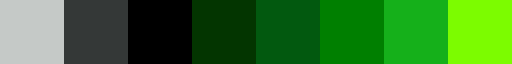

In [91]:
colors.random_colormap_selection(categories=True)

<Axes: xlabel='sqrt frequency', ylabel='key'>

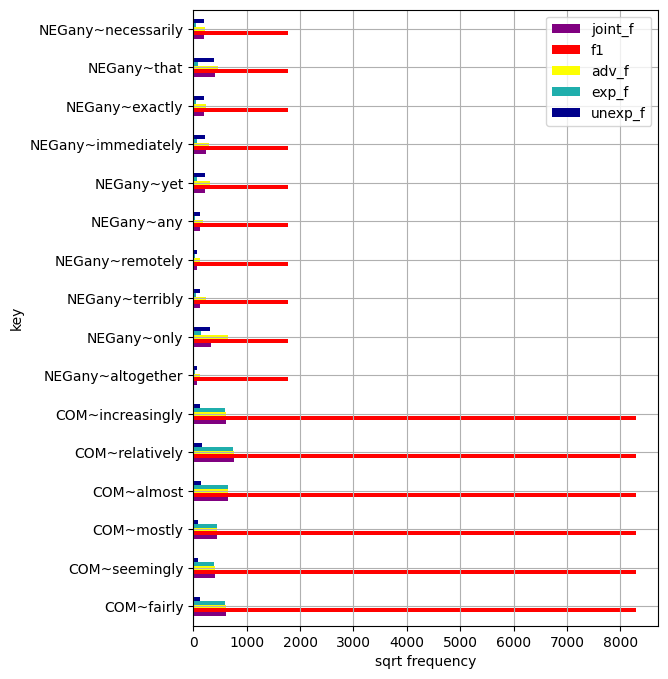

In [92]:
super_top = tops['super10'].sort_values('dP1')
super_top.loc[:, 'key'] = super_top.l1.str[:3].replace('NEG', 'NEGany') + '~' + super_top.l2
super_top = super_top.set_index('key').rename(columns={'l2':'adv', 'f2':'adv_f', 'f':'joint_f'})
transform_counts(super_top.filter(like='f')
                 ).plot(kind='barh', colormap='myrain', grid=True, xlabel='sqrt frequency', figsize=(6,8))

<Axes: ylabel='raw frequency'>

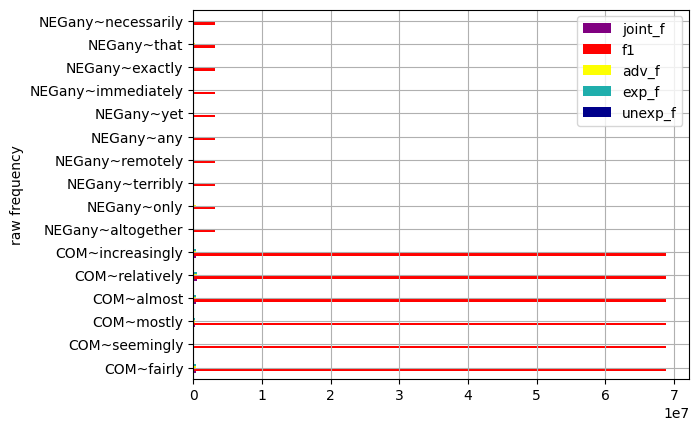

In [93]:
super_top.filter(like='f').plot(
    kind='barh', colormap='myrain',
    grid=True, ylabel='raw frequency')

In [94]:
    
[setdiff_top15, mirror_top15] = [
    get_top_vals(adjust_am_names(adv_df),
                 k=15, index_like=None, 
                 metric_filter=METRIC_PRI_2)
    .assign(adv=adv_df.l2)
    for adv_df in (setdiff_adv, mirror_adv)
]
# print(f'### 15 Most Negatively Associated Adverbs for {TAG} data superset\n',
#       '_Absent Negative_ approximation',
#       f'ranked by {" & ".join([f"`{m}`" for m in METRIC_PRI_2])}', 
#       sep='\n+ ')
# nb_show_table(setdiff_top15.reset_index()
#               .filter(items = ['adv'] + adjust_am_names(FOCUS)).filter(regex=r'^[^l]')
#               )

### 15 Most Negatively Associated Adverbs for ALL data superset

+ _Absent Negative_ approximation
+ ranked by `dP1` & `LRC`

|        | `adv`        |       `f` |   `dP1` |   `LRC` |   `P1` |       `G2` |       `f1` |      `f2` |        `N` |      `exp_f` |   `unexp_f` |   `unexp_r` |   `odds_r_disc` |    `t` |   `MI` |
|:-------|:-------------|----------:|--------:|--------:|-------:|-----------:|-----------:|----------:|-----------:|-------------:|------------:|------------:|----------------:|-------:|-------:|
| **1**  | necessarily  |    42,595 |    0.83 |    7.15 |   0.88 | 230,465.59 |  3,173,681 |    48,641 | 71,961,373 |     2,145.19 |   40,449.81 |        0.95 |            2.19 | 195.99 |   1.30 |
| **2**  | that         |   164,768 |    0.75 |    6.37 |   0.80 | 831,669.72 |  3,173,681 |   206,801 | 71,961,373 |     9,120.45 |  155,647.55 |        0.94 |            1.95 | 383.45 |   1.26 |
| **3**  | exactly      |    43,813 |    0.74 |    6.19 |   0.78 | 216,169.98 |  3,173,681 |    56,109 | 71,961,373 |     2,474.55 |   41,338.45 |        0.94 |            1.89 | 197.49 |   1.25 |
| **4**  | immediately  |    56,099 |    0.57 |    5.04 |   0.61 | 231,721.98 |  3,173,681 |    91,746 | 71,961,373 |     4,046.23 |   52,052.77 |        0.93 |            1.54 | 219.77 |   1.14 |
| **5**  | yet          |    51,867 |    0.50 |    4.66 |   0.55 | 197,895.38 |  3,173,681 |    94,755 | 71,961,373 |     4,178.94 |   47,688.06 |        0.92 |            1.43 | 209.39 |   1.09 |
| **6**  | any          |    15,384 |    0.43 |    4.22 |   0.48 |  53,087.82 |  3,173,681 |    32,161 | 71,961,373 |     1,418.38 |   13,965.62 |        0.91 |            1.30 | 112.60 |   1.04 |
| **7**  | remotely     |     5,661 |    0.32 |    3.52 |   0.37 |  15,974.28 |  3,173,681 |    15,394 | 71,961,373 |       678.91 |    4,982.09 |        0.88 |            1.10 |  66.22 |   0.92 |
| **8**  | terribly     |    17,949 |    0.26 |    3.19 |   0.31 |  43,629.29 |  3,173,681 |    58,529 | 71,961,373 |     2,581.28 |   15,367.72 |        0.86 |            0.98 | 114.71 |   0.84 |
| **9**  | only         |   113,502 |    0.22 |    2.92 |   0.26 | 242,355.41 |  3,173,681 |   432,612 | 71,961,373 |    19,079.30 |   94,422.70 |        0.83 |            0.90 | 280.27 |   0.77 |
| **10** | overly       |    24,613 |    0.20 |    2.77 |   0.25 |  49,011.01 |  3,173,681 |    99,920 | 71,961,373 |     4,406.73 |   20,206.27 |        0.82 |            0.85 | 128.80 |   0.75 |
| **11** | entirely     |    63,321 |    0.19 |    2.70 |   0.24 | 121,185.87 |  3,173,681 |   268,856 | 71,961,373 |    11,857.24 |   51,463.76 |        0.81 |            0.83 | 204.52 |   0.73 |
| **12** | merely       |     5,918 |    0.16 |    2.33 |   0.20 |   9,539.23 |  3,173,681 |    29,401 | 71,961,373 |     1,296.66 |    4,621.34 |        0.78 |            0.74 |  60.07 |   0.66 |
| **13** | always       |   103,883 |    0.13 |    2.14 |   0.17 | 141,064.65 |  3,173,681 |   604,097 | 71,961,373 |    26,642.23 |   77,240.77 |        0.74 |            0.66 | 239.65 |   0.59 |
| **14** | as           |   531,731 |    0.13 |    2.08 |   0.16 | 727,572.78 |  3,173,681 | 3,231,640 | 71,961,373 |   142,523.61 |  389,207.39 |        0.73 |            0.69 | 533.75 |   0.57 |
| **15** | directly     |     8,197 |    0.12 |    2.04 |   0.17 |  10,698.67 |  3,173,681 |    48,680 | 71,961,373 |     2,146.91 |    6,050.09 |        0.74 |            0.64 |  66.82 |   0.58 |
| **16** | increasingly |   373,560 |    0.04 |    7.04 |   1.00 |  32,850.41 | 68,787,692 |   373,633 | 71,961,373 |   357,154.83 |   16,405.17 |        0.04 |            2.37 |  26.84 |   0.02 |
| **17** | albeit       |    15,663 |    0.04 |    4.81 |   1.00 |   1,374.47 | 68,787,692 |    15,666 | 71,961,373 |    14,975.09 |      687.91 |        0.04 |            2.31 |   5.50 |   0.02 |
| **18** | relatively   |   582,065 |    0.04 |    5.98 |   1.00 |  49,292.09 | 68,787,692 |   582,383 | 71,961,373 |   556,698.42 |   25,366.58 |        0.04 |            1.93 |  33.25 |   0.02 |
| **19** | pretty       | 1,505,944 |    0.04 |    4.98 |   1.00 | 119,539.22 | 68,787,692 | 1,507,900 | 71,961,373 | 1,441,397.75 |   64,546.25 |        0.04 |            1.56 |  52.60 |   0.02 |
| **20** | almost       |   433,210 |    0.04 |    5.27 |   1.00 |  35,325.48 | 68,787,692 |   433,607 | 71,961,373 |   414,483.82 |   18,726.18 |        0.04 |            1.70 |  28.45 |   0.02 |
| **21** | mostly       |   199,493 |    0.04 |    5.10 |   1.00 |  16,237.07 | 68,787,692 |   199,676 | 71,961,373 |   190,869.78 |    8,623.22 |        0.04 |            1.70 |  19.31 |   0.02 |
| **22** | seemingly    |   160,011 |    0.04 |    5.04 |   1.00 |  13,017.97 | 68,787,692 |   160,158 | 71,961,373 |   153,094.62 |    6,916.38 |        0.04 |            1.70 |  17.29 |   0.02 |
| **23** | partly       |    78,695 |    0.04 |    4.82 |   1.00 |   6,408.48 | 68,787,692 |    78,766 | 71,961,373 |    75,292.22 |    3,402.78 |        0.04 |            1.71 |  12.13 |   0.02 |
| **24** | fairly       |   370,708 |    0.04 |    4.99 |   1.00 |  29,631.19 | 68,787,692 |   371,125 | 71,961,373 |   354,757.44 |   15,950.56 |        0.04 |            1.61 |  26.20 |   0.02 |
| **25** | largely      |   172,937 |    0.04 |    4.88 |   1.00 |  13,872.59 | 68,787,692 |   173,122 | 71,961,373 |   165,486.88 |    7,450.12 |        0.04 |            1.63 |  17.92 |   0.02 |
| **26** | rather       |   361,601 |    0.04 |    4.75 |   1.00 |  28,312.35 | 68,787,692 |   362,090 | 71,961,373 |   346,120.90 |   15,480.10 |        0.04 |            1.53 |  25.74 |   0.02 |



In [95]:
# print(f'### 15 Most Negatively Associated Adverbs for {TAG} data subset\n',
#       '_Present Positive_ approximation',
#       f'ranked by {" & ".join([f"`{m}`" for m in METRIC_PRI_2])}', 
#       sep='\n+ ')
# nb_show_table(mirror_top15.reset_index()
#               .filter(items = ['adv'] + adjust_am_names(FOCUS))
#               .filter(regex=r'^[^l]'))

### 15 Most Negatively Associated Adverbs for ALL data subset

+ _Present Positive_ approximation
+ ranked by `dP1` & `LRC`

|        | `adv`        |    `f` |   `dP1` |   `LRC` |   `P1` |      `G2` |      `f1` |   `f2` |       `N` |   `exp_f` |   `unexp_f` |   `unexp_r` |   `odds_r_disc` |   `t` |   `MI` |
|:-------|:-------------|-------:|--------:|--------:|-------:|----------:|----------:|-------:|----------:|----------:|------------:|------------:|----------------:|------:|-------:|
| **1**  | ever         |  4,709 |    0.76 |    5.67 |   0.93 | 14,226.71 |   291,735 |  5,042 | 1,680,633 |    875.22 |    3,833.78 |        0.81 |            1.83 | 55.87 |   0.73 |
| **2**  | any          |  1,066 |    0.74 |    4.91 |   0.91 |  3,078.62 |   291,735 |  1,169 | 1,680,633 |    202.92 |      863.08 |        0.81 |            1.69 | 26.43 |   0.72 |
| **3**  | longer       |    821 |    0.73 |    4.69 |   0.90 |  2,328.22 |   291,735 |    910 | 1,680,633 |    157.96 |      663.04 |        0.81 |            1.64 | 23.14 |   0.72 |
| **4**  | necessarily  |    963 |    0.71 |    4.50 |   0.88 |  2,631.06 |   291,735 |  1,092 | 1,680,633 |    189.56 |      773.44 |        0.80 |            1.55 | 24.92 |   0.71 |
| **5**  | remotely     |  1,840 |    0.62 |    3.84 |   0.80 |  4,286.74 |   291,735 |  2,314 | 1,680,633 |    401.68 |    1,438.32 |        0.78 |            1.27 | 33.53 |   0.66 |
| **6**  | that         |  4,308 |    0.62 |    3.91 |   0.79 |  9,933.37 |   291,735 |  5,465 | 1,680,633 |    948.65 |    3,359.35 |        0.78 |            1.25 | 51.18 |   0.66 |
| **7**  | exactly      |    813 |    0.62 |    3.61 |   0.79 |  1,868.34 |   291,735 |  1,031 | 1,680,633 |    178.97 |      634.03 |        0.78 |            1.25 | 22.24 |   0.66 |
| **8**  | particularly |  9,243 |    0.54 |    3.43 |   0.71 | 18,490.40 |   291,735 | 12,946 | 1,680,633 |  2,247.25 |    6,995.75 |        0.76 |            1.09 | 72.77 |   0.61 |
| **9**  | inherently   |  2,864 |    0.39 |    2.40 |   0.56 |  3,906.56 |   291,735 |  5,100 | 1,680,633 |    885.29 |    1,978.71 |        0.69 |            0.79 | 36.97 |   0.51 |
| **10** | especially   |  1,569 |    0.23 |    1.44 |   0.40 |  1,127.11 |   291,735 |  3,905 | 1,680,633 |    677.85 |      891.15 |        0.57 |            0.51 | 22.50 |   0.36 |
| **11** | fully        |  1,664 |    0.19 |    1.23 |   0.37 |    951.65 |   291,735 |  4,558 | 1,680,633 |    791.21 |      872.79 |        0.52 |            0.44 | 21.40 |   0.32 |
| **12** | pretty       | 24,525 |    0.17 |    4.73 |   0.99 |  8,277.42 | 1,388,898 | 24,652 | 1,680,633 | 20,372.75 |    4,152.25 |        0.17 |            1.61 | 26.51 |   0.08 |
| **13** | plain        |  5,025 |    0.17 |    4.45 |   1.00 |  1,751.25 | 1,388,898 |  5,042 | 1,680,633 |  4,166.78 |      858.22 |        0.17 |            1.78 | 12.11 |   0.08 |
| **14** | rather       |  8,364 |    0.17 |    4.63 |   1.00 |  2,889.54 | 1,388,898 |  8,396 | 1,680,633 |  6,938.57 |    1,425.43 |        0.17 |            1.74 | 15.59 |   0.08 |
| **15** | somewhat     |  4,475 |    0.17 |    4.33 |   1.00 |  1,552.53 | 1,388,898 |  4,491 | 1,680,633 |  3,711.42 |      763.58 |        0.17 |            1.76 | 11.41 |   0.08 |
| **16** | maybe        |  2,654 |    0.17 |    4.00 |   1.00 |    924.01 | 1,388,898 |  2,663 | 1,680,633 |  2,200.74 |      453.26 |        0.17 |            1.77 |  8.80 |   0.08 |
| **17** | fairly       |  5,661 |    0.17 |    4.33 |   1.00 |  1,936.22 | 1,388,898 |  5,685 | 1,680,633 |  4,698.16 |      962.84 |        0.17 |            1.69 | 12.80 |   0.08 |
| **18** | otherwise    |  6,653 |    0.17 |    4.04 |   0.99 |  2,179.49 | 1,388,898 |  6,695 | 1,680,633 |  5,532.84 |    1,120.16 |        0.17 |            1.52 | 13.73 |   0.08 |
| **19** | downright    |  4,691 |    0.17 |    3.89 |   0.99 |  1,539.76 | 1,388,898 |  4,720 | 1,680,633 |  3,900.67 |      790.33 |        0.17 |            1.53 | 11.54 |   0.08 |
| **20** | already      |  4,238 |    0.17 |    3.81 |   0.99 |  1,385.51 | 1,388,898 |  4,265 | 1,680,633 |  3,524.65 |      713.35 |        0.17 |            1.51 | 10.96 |   0.08 |



In [96]:
print(f'* Total unique mirror adv where LRC >= 1 and f > {MIR_FLOOR:,}',
      (mirror_adv.loc[mirror_adv.LRC > 1]
       .value_counts('l1').to_frame('adv subtotal')
       .to_markdown(intfmt=',', tablefmt='simple')),
      (adjust_am_names(
          catify(mirror_adv, reverse=True).filter(like='NEG', axis=0))
       .loc[mirror_adv.LRC >= 1, ['l2', 'f']+METRIC_PRIORITIES]
       .sort_values(METRIC_PRIORITIES[0], ascending=False)
       .to_markdown(intfmt=',', floatfmt=',.2f', tablefmt='simple_outline')),
      sep='\n\n')

* Total unique mirror adv where LRC >= 1 and f > 200

l1        adv subtotal
------  --------------
POSMIR             108
NEGMIR              18

┌──────────────────────┬───────────────┬───────┬───────┬───────┬───────────┬──────┐
│ key                  │ l2            │     f │   dP1 │   LRC │        G2 │   P1 │
├──────────────────────┼───────────────┼───────┼───────┼───────┼───────────┼──────┤
│ NEGmir~not           │ not           │ 1,404 │  0.83 │  8.76 │  4,922.63 │ 1.00 │
│ NEGmir~n't           │ n't           │   245 │  0.83 │  6.20 │    858.20 │ 1.00 │
│ NEGmir~before        │ before        │   289 │  0.82 │  6.19 │    999.41 │ 1.00 │
│ NEGmir~ever          │ ever          │ 4,709 │  0.76 │  5.67 │ 14,226.71 │ 0.93 │
│ NEGmir~any           │ any           │ 1,066 │  0.74 │  4.91 │  3,078.62 │ 0.91 │
│ NEGmir~longer        │ longer        │   821 │  0.73 │  4.69 │  2,328.22 │ 0.90 │
│ NEGmir~necessarily   │ necessarily   │   963 │  0.71 │  4.50 │  2,631.06 │ 0.88 │
│ NEGmir~remo

### Or here, the least "negative"/most "non-negative"

In [97]:
show_top_positive(setdiff_adv, k=15, data_tag=TAG, filter_and_sort=METRIC_PRI_2, 
                  save_path =combined_top_csv_output.with_name(
                         combined_top_csv_output.name.replace('NEG', 'POS')
                         .replace('combined', 'super')))

#### Top 15 Adverbs in *Complement* Polarity Environment (`set_diff`, $*\complement_{N^+}$)

> ranked by `['dP1', 'LRC']`

**Total Tokens in dataset**: $N = 71,961,373$

|                    |   `dP1` |   `LRC` |       `f` |   `P1` |       `G2` |       `f1` |      `f2` |      `exp_f` |   `unexp_f` |   `unexp_r` |
|:-------------------|--------:|--------:|----------:|-------:|-----------:|-----------:|----------:|-------------:|------------:|------------:|
| **most**           |    0.05 |    4.04 | 7,101,224 |   1.00 | 525,721.02 | 68,787,692 | 7,120,428 | 6,806,398.87 |  294,825.13 |        0.04 |
| **increasingly**   |    0.04 |    7.04 |   373,560 |   1.00 |  32,850.41 | 68,787,692 |   373,633 |   357,154.83 |   16,405.17 |        0.04 |
| **relatively**     |    0.04 |    5.98 |   582,065 |   1.00 |  49,292.09 | 68,787,692 |   582,383 |   556,698.42 |   25,366.58 |        0.04 |
| **almost**         |    0.04 |    5.27 |   433,210 |   1.00 |  35,325.48 | 68,787,692 |   433,607 |   4

#### Top 15 Adverbs in *Complement* Polarity Environment (`set_diff`, $*\complement_{N^+}$)

> ranked by `['dP1', 'LRC']`

**Total Tokens in dataset**: $N = 71,961,373$

|                    |   `dP1` |   `LRC` |       `f` |   `P1` |       `G2` |       `f1` |      `f2` |      `exp_f` |   `unexp_f` |   `unexp_r` |   `odds_r_disc` |    `t` |   `MI` |
|:-------------------|--------:|--------:|----------:|-------:|-----------:|-----------:|----------:|-------------:|------------:|------------:|----------------:|-------:|-------:|
| **most**           |    0.05 |    4.04 | 7,101,224 |   1.00 | 525,721.02 | 68,787,692 | 7,120,428 | 6,806,398.87 |  294,825.13 |        0.04 |            1.28 | 110.64 |   0.02 |
| **increasingly**   |    0.04 |    7.04 |   373,560 |   1.00 |  32,850.41 | 68,787,692 |   373,633 |   357,154.83 |   16,405.17 |        0.04 |            2.37 |  26.84 |   0.02 |
| **relatively**     |    0.04 |    5.98 |   582,065 |   1.00 |  49,292.09 | 68,787,692 |   582,383 |   556,698.42 |   25,366.58 |        0.04 |            1.93 |  33.25 |   0.02 |
| **almost**         |    0.04 |    5.27 |   433,210 |   1.00 |  35,325.48 | 68,787,692 |   433,607 |   414,483.82 |   18,726.18 |        0.04 |            1.70 |  28.45 |   0.02 |
| **mostly**         |    0.04 |    5.10 |   199,493 |   1.00 |  16,237.07 | 68,787,692 |   199,676 |   190,869.78 |    8,623.22 |        0.04 |            1.70 |  19.31 |   0.02 |
| **seemingly**      |    0.04 |    5.04 |   160,011 |   1.00 |  13,017.97 | 68,787,692 |   160,158 |   153,094.62 |    6,916.38 |        0.04 |            1.70 |  17.29 |   0.02 |
| **fairly**         |    0.04 |    4.99 |   370,708 |   1.00 |  29,631.19 | 68,787,692 |   371,125 |   354,757.44 |   15,950.56 |        0.04 |            1.61 |  26.20 |   0.02 |
| **pretty**         |    0.04 |    4.98 | 1,505,944 |   1.00 | 119,539.22 | 68,787,692 | 1,507,900 | 1,441,397.74 |   64,546.25 |        0.04 |            1.56 |  52.60 |   0.02 |
| **largely**        |    0.04 |    4.88 |   172,937 |   1.00 |  13,872.59 | 68,787,692 |   173,122 |   165,486.88 |    7,450.12 |        0.04 |            1.63 |  17.92 |   0.02 |
| **partly**         |    0.04 |    4.82 |    78,695 |   1.00 |   6,408.48 | 68,787,692 |    78,766 |    75,292.22 |    3,402.78 |        0.04 |            1.71 |  12.13 |   0.02 |
| **albeit**         |    0.04 |    4.81 |    15,663 |   1.00 |   1,374.47 | 68,787,692 |    15,666 |    14,975.09 |      687.91 |        0.04 |            2.31 |   5.50 |   0.02 |
| **rather**         |    0.04 |    4.75 |   361,601 |   1.00 |  28,312.35 | 68,787,692 |   362,090 |   346,120.90 |   15,480.10 |        0.04 |            1.53 |  25.74 |   0.02 |
| **sometimes**      |    0.04 |    4.57 |   141,919 |   1.00 |  11,113.35 | 68,787,692 |   142,108 |   135,840.67 |    6,078.33 |        0.04 |            1.54 |  16.13 |   0.02 |
| **also**           |    0.04 |    4.46 | 1,062,460 |   1.00 |  80,113.15 | 68,787,692 | 1,064,426 | 1,017,482.08 |   44,977.92 |        0.04 |            1.40 |  43.64 |   0.02 |
| **supposedly**     |    0.04 |    4.40 |    27,317 |   1.00 |   2,244.56 | 68,787,692 |    27,339 |    26,133.28 |    1,183.72 |        0.04 |            1.75 |   7.16 |   0.02 |
| **virtually**      |    0.04 |    4.33 |    85,585 |   1.00 |   6,629.69 | 68,787,692 |    85,709 |    81,929.01 |    3,655.99 |        0.04 |            1.50 |  12.50 |   0.02 |
| **allegedly**      |    0.04 |    4.06 |    16,217 |   1.00 |   1,332.88 | 68,787,692 |    16,230 |    15,514.22 |      702.78 |        0.04 |            1.74 |   5.52 |   0.02 |
| **understandably** |    0.04 |    3.98 |    12,266 |   1.00 |   1,023.17 | 68,787,692 |    12,274 |    11,732.68 |      533.32 |        0.04 |            1.82 |   4.82 |   0.02 |
| **admittedly**     |    0.04 |    3.86 |    12,476 |   1.00 |   1,025.38 | 68,787,692 |    12,486 |    11,935.34 |      540.67 |        0.04 |            1.74 |   4.84 |   0.02 |
| **undoubtedly**    |    0.04 |    3.82 |    11,606 |   1.00 |     956.31 | 68,787,692 |    11,615 |    11,102.75 |      503.25 |        0.04 |            1.75 |   4.67 |   0.02 |
| **presumably**     |    0.04 |    3.70 |     7,230 |   1.00 |     618.25 | 68,787,692 |     7,233 |     6,914.01 |      315.99 |        0.04 |            1.98 |   3.72 |   0.02 |
| **hopefully**      |    0.04 |    3.46 |     7,173 |   1.00 |     595.63 | 68,787,692 |     7,178 |     6,861.43 |      311.57 |        0.04 |            1.78 |   3.68 |   0.02 |


> saved as:  
> `/share/compling/projects/sanpi/results/top_AM/ALL/ALL-Top8/ALL-Top8_POS-ADV_super-5000.2024-08-05.csv`



In [98]:
# Mirror Data ~ explicitly positive ~ positive trigger present
show_top_positive(mirror_adv, k=15, data_tag=TAG, filter_and_sort=METRIC_PRI_2, 
                  save_path =combined_top_csv_output.with_name(
                         combined_top_csv_output.name.replace('NEG', 'POS')
                         .replace('combined', 'mirror')))

#### Top 15 Adverbs in *Posmir* Polarity Environment (`mirror`, $@P$)

> ranked by `['dP1', 'LRC']`

**Total Tokens in dataset**: $N = 1,680,633$

|                    |   `dP1` |   `LRC` |    `f` |   `P1` |     `G2` |      `f1` |   `f2` |   `exp_f` |   `unexp_f` |   `unexp_r` |
|:-------------------|--------:|--------:|-------:|-------:|---------:|----------:|-------:|----------:|------------:|------------:|
| **pretty**         |    0.17 |    4.73 | 24,525 |   0.99 | 8,277.42 | 1,388,898 | 24,652 | 20,372.75 |    4,152.25 |        0.17 |
| **rather**         |    0.17 |    4.63 |  8,364 |   1.00 | 2,889.54 | 1,388,898 |  8,396 |  6,938.57 |    1,425.43 |        0.17 |
| **plain**          |    0.17 |    4.45 |  5,025 |   1.00 | 1,751.25 | 1,388,898 |  5,042 |  4,166.78 |      858.22 |        0.17 |
| **somewhat**       |    0.17 |    4.33 |  4,475 |   1.00 | 1,552.53 | 1,388,898 |  4,491 |  3,711.42 |      763.58 |        0.17 |
| **fairly**         |    0.17 |    4.33 |  5,661 |   1

#### Top 15 Adverbs in *Posmir* Polarity Environment (`mirror`, $@P$)

> ranked by `['dP1', 'LRC']`

**Total Tokens in dataset**: $N = 1,680,633$

|                  |   `dP1` |   `LRC` |    `f` |   `P1` |     `G2` |      `f1` |   `f2` |   `exp_f` |   `unexp_f` |   `unexp_r` |   `odds_r_disc` |   `t` |   `MI` |
|:-----------------|--------:|--------:|-------:|-------:|---------:|----------:|-------:|----------:|------------:|------------:|----------------:|------:|-------:|
| **pretty**       |    0.17 |    4.73 | 24,525 |   0.99 | 8,277.42 | 1,388,898 | 24,652 | 20,372.75 |    4,152.25 |        0.17 |            1.61 | 26.51 |   0.08 |
| **rather**       |    0.17 |    4.63 |  8,364 |   1.00 | 2,889.54 | 1,388,898 |  8,396 |  6,938.57 |    1,425.43 |        0.17 |            1.74 | 15.59 |   0.08 |
| **plain**        |    0.17 |    4.45 |  5,025 |   1.00 | 1,751.25 | 1,388,898 |  5,042 |  4,166.78 |      858.22 |        0.17 |            1.78 | 12.11 |   0.08 |
| **somewhat**     |    0.17 |    4.33 |  4,475 |   1.00 | 1,552.53 | 1,388,898 |  4,491 |  3,711.42 |      763.58 |        0.17 |            1.76 | 11.41 |   0.08 |
| **fairly**       |    0.17 |    4.33 |  5,661 |   1.00 | 1,936.22 | 1,388,898 |  5,685 |  4,698.16 |      962.84 |        0.17 |            1.69 | 12.80 |   0.08 |
| **otherwise**    |    0.17 |    4.04 |  6,653 |   0.99 | 2,179.49 | 1,388,898 |  6,695 |  5,532.84 |    1,120.16 |        0.17 |            1.52 | 13.73 |   0.08 |
| **maybe**        |    0.17 |    4.00 |  2,654 |   1.00 |   924.01 | 1,388,898 |  2,663 |  2,200.74 |      453.26 |        0.17 |            1.77 |  8.80 |   0.08 |
| **downright**    |    0.17 |    3.89 |  4,691 |   0.99 | 1,539.76 | 1,388,898 |  4,720 |  3,900.67 |      790.33 |        0.17 |            1.53 | 11.54 |   0.08 |
| **already**      |    0.17 |    3.81 |  4,238 |   0.99 | 1,385.51 | 1,388,898 |  4,265 |  3,524.65 |      713.35 |        0.17 |            1.51 | 10.96 |   0.08 |
| **relatively**   |    0.17 |    3.81 |  5,287 |   0.99 | 1,701.02 | 1,388,898 |  5,325 |  4,400.65 |      886.35 |        0.17 |            1.46 | 12.19 |   0.08 |
| **almost**       |    0.17 |    3.73 |  5,265 |   0.99 | 1,674.01 | 1,388,898 |  5,306 |  4,384.95 |      880.05 |        0.17 |            1.43 | 12.13 |   0.08 |
| **perhaps**      |    0.17 |    3.52 |  3,479 |   0.99 | 1,106.00 | 1,388,898 |  3,506 |  2,897.41 |      581.59 |        0.17 |            1.43 |  9.86 |   0.08 |
| **surprisingly** |    0.17 |    2.96 |  1,426 |   0.99 |   453.41 | 1,388,898 |  1,437 |  1,187.56 |      238.44 |        0.17 |            1.42 |  6.31 |   0.08 |
| **sometimes**    |    0.17 |    2.87 |  1,349 |   0.99 |   425.24 | 1,388,898 |  1,360 |  1,123.92 |      225.08 |        0.17 |            1.39 |  6.13 |   0.08 |
| **strangely**    |    0.17 |    2.30 |    698 |   0.99 |   218.10 | 1,388,898 |    704 |    581.80 |      116.20 |        0.17 |            1.35 |  4.40 |   0.08 |
| **equally**      |    0.16 |    3.58 |  7,197 |   0.99 | 2,188.88 | 1,388,898 |  7,270 |  6,008.03 |    1,188.97 |        0.17 |            1.32 | 14.02 |   0.08 |
| **highly**       |    0.16 |    3.27 |  9,093 |   0.99 | 2,565.38 | 1,388,898 |  9,223 |  7,622.01 |    1,470.99 |        0.16 |            1.17 | 15.43 |   0.08 |
| **slightly**     |    0.16 |    3.24 |  7,552 |   0.99 | 2,139.28 | 1,388,898 |  7,658 |  6,328.68 |    1,223.32 |        0.16 |            1.18 | 14.08 |   0.08 |


> saved as:  
> `/share/compling/projects/sanpi/results/top_AM/ALL/ALL-Top8/ALL-Top8_POS-ADV_mirror-5000.2024-08-05.csv`



## Compile top NEG~adverb associations across both approximation methods

### Define the functions

[_moved to `./am_notebooks.py`_]

### Run it 🏃‍♀️

In [99]:
C = combine_top_adv(
    df_1=setdiff_adv, name_1='SET',
    df_2=mirror_adv, name_2='MIR',
    adv_am_paths=adv_am_paths,
    data_tag=TAG,
    filter_items=pd.Series(FOCUS + METRIC_PRIORITIES
                           ).drop_duplicates().to_list(),
    set_floor=SET_FLOOR,
    k=K)

### `ALL` Most Negative Adverb Selections

`SET`: union of top 8 adverbs ranked by `['dP1', 'LRC']`
1. _necessarily_
1. _that_
1. _exactly_
1. _immediately_
1. _yet_
1. _any_
1. _remotely_
1. _terribly_


`MIR`: union of top 8 adverbs ranked by `['dP1', 'LRC']`
1. _before_
1. _ever_
1. _any_
1. _longer_
1. _necessarily_
1. _remotely_
1. _that_
1. _exactly_


Union of top adverbs for `SET` and `MIR`. (Novel `MIR` adverbs listed last)
1. _necessarily_
1. _that_
1. _exactly_
1. _immediately_
1. _yet_
1. _any_
1. _remotely_
1. _terribly_
1. _before_
1. _ever_
1. _longer_


### `SET` Adverb Associations (in initially loaded table)


|                 |     `f` |   `dP1` |   `LRC` |   `P1` |       `G2` |      `f1` |    `f2` |   `exp_f` |   `unexp_f` |   `unexp_r` |
|:----------------|--------:|--------:|--------:|-------:|-----------:|----------:|--------:|----------:|------------:|------------:|
| **necessarily** |  42,595 |    0.83 |    7.15 |   0.88 | 230,465.59 | 3,173,681 |  48,641 |  2


|                 |   `f` |   `dP1` |   `LRC` |   `P1` |      `G2` |    `f1` |   `f2` |   `exp_f` |   `unexp_f` |   `unexp_r` |
|:----------------|------:|--------:|--------:|-------:|----------:|--------:|-------:|----------:|------------:|------------:|
| **before**      |   289 |    0.82 |    6.19 |   1.00 |    999.41 | 291,735 |    290 |     50.34 |      238.66 |        0.83 |
| **ever**        | 4,709 |    0.76 |    5.67 |   0.93 | 14,226.71 | 291,735 |  5,042 |    875.22 |    3,833.78 |        0.81 |
| **any**         | 1,066 |    0.74 |    4.91 |   0.91 |  3,078.62 | 291,735 |  1,169 |    202.92 |      863.08 |        0.81 |
| **longer**      |   821 |    0.73 |    4.69 |   0.90 |  2,328.22 | 291,735 |    910 |    157.96 |      663.04 |        0.81 |
| **necessarily** |   963 |    0.71 |    4.50 |   0.88 |  2,631.06 | 291,735 |  1,092 |    189.56 |      773.44 |        0.80 |
| **that**        | 4,308 |    0.62 |    3.91 |   0.79 |  9,933.37 | 291,735 |  5,465 |    948.65 |    

### `ALL` Most Negative Adverb Selections

`SET`: union of top 8 adverbs ranked by `['dP1', 'LRC']`
1. _necessarily_
1. _that_
1. _exactly_
1. _immediately_
1. _yet_
1. _any_
1. _remotely_
1. _terribly_

`MIR`: union of top 8 adverbs ranked by `['dP1', 'LRC']`
1. _ever_
1. _any_
1. _longer_
1. _necessarily_
1. _remotely_
1. _that_
1. _exactly_
1. _particularly_

Union of top adverbs for `SET` and `MIR`. (Novel `MIR` adverbs listed last)
1. _necessarily_
1. _that_
1. _exactly_
1. _immediately_
1. _yet_
1. _any_
1. _remotely_
1. _terribly_
1. _ever_
1. _longer_
1. _particularly_

### `SET` Adverb Associations (in initially loaded table)


|                  |     `f` |   `dP1` |   `LRC` |   `P1` |       `G2` |      `f1` |    `f2` |   `exp_f` |   `unexp_f` |   `unexp_r` |   `odds_r_disc` |    `t` |   `MI` |
|:-----------------|--------:|--------:|--------:|-------:|-----------:|----------:|--------:|----------:|------------:|------------:|----------------:|-------:|-------:|
| **necessarily**  |  42,595 |    0.83 |    7.15 |   0.88 | 230,465.59 | 3,173,681 |  48,641 |  2,145.19 |   40,449.81 |        0.95 |            2.19 | 195.99 |   1.30 |
| **that**         | 164,768 |    0.75 |    6.37 |   0.80 | 831,669.72 | 3,173,681 | 206,801 |  9,120.45 |  155,647.55 |        0.94 |            1.95 | 383.45 |   1.26 |
| **exactly**      |  43,813 |    0.74 |    6.19 |   0.78 | 216,169.98 | 3,173,681 |  56,109 |  2,474.55 |   41,338.45 |        0.94 |            1.89 | 197.49 |   1.25 |
| **immediately**  |  56,099 |    0.57 |    5.04 |   0.61 | 231,721.98 | 3,173,681 |  91,746 |  4,046.23 |   52,052.77 |        0.93 |            1.54 | 219.77 |   1.14 |
| **yet**          |  51,867 |    0.50 |    4.66 |   0.55 | 197,895.38 | 3,173,681 |  94,755 |  4,178.94 |   47,688.06 |        0.92 |            1.43 | 209.39 |   1.09 |
| **any**          |  15,384 |    0.43 |    4.22 |   0.48 |  53,087.82 | 3,173,681 |  32,161 |  1,418.38 |   13,965.62 |        0.91 |            1.30 | 112.60 |   1.04 |
| **remotely**     |   5,661 |    0.32 |    3.52 |   0.37 |  15,974.28 | 3,173,681 |  15,394 |    678.92 |    4,982.08 |        0.88 |            1.10 |  66.22 |   0.92 |
| **terribly**     |  17,949 |    0.26 |    3.19 |   0.31 |  43,629.29 | 3,173,681 |  58,529 |  2,581.28 |   15,367.72 |        0.86 |            0.98 | 114.71 |   0.84 |
| **particularly** |  55,527 |    0.06 |    1.36 |   0.11 |  36,699.74 | 3,173,681 | 511,734 | 22,568.78 |   32,958.22 |        0.59 |            0.43 | 139.87 |   0.39 |
| **ever**         |   5,932 |    0.01 |    0.18 |   0.05 |     216.40 | 3,173,681 | 110,979 |  4,894.46 |    1,037.54 |        0.17 |            0.09 |  13.47 |   0.08 |


### `MIR` Adverb Associations (in initially loaded table)


|                  |   `f` |   `dP1` |   `LRC` |   `P1` |      `G2` |    `f1` |   `f2` |   `exp_f` |   `unexp_f` |   `unexp_r` |   `odds_r_disc` |   `t` |   `MI` |
|:-----------------|------:|--------:|--------:|-------:|----------:|--------:|-------:|----------:|------------:|------------:|----------------:|------:|-------:|
| **ever**         | 4,709 |    0.76 |    5.67 |   0.93 | 14,226.71 | 291,735 |  5,042 |    875.22 |    3,833.78 |        0.81 |            1.83 | 55.87 |   0.73 |
| **any**          | 1,066 |    0.74 |    4.91 |   0.91 |  3,078.62 | 291,735 |  1,169 |    202.92 |      863.08 |        0.81 |            1.69 | 26.43 |   0.72 |
| **longer**       |   821 |    0.73 |    4.69 |   0.90 |  2,328.22 | 291,735 |    910 |    157.96 |      663.04 |        0.81 |            1.64 | 23.14 |   0.72 |
| **necessarily**  |   963 |    0.71 |    4.50 |   0.88 |  2,631.06 | 291,735 |  1,092 |    189.56 |      773.44 |        0.80 |            1.55 | 24.92 |   0.71 |
| **that**         | 4,308 |    0.62 |    3.91 |   0.79 |  9,933.37 | 291,735 |  5,465 |    948.65 |    3,359.35 |        0.78 |            1.25 | 51.18 |   0.66 |
| **remotely**     | 1,840 |    0.62 |    3.84 |   0.80 |  4,286.74 | 291,735 |  2,314 |    401.68 |    1,438.32 |        0.78 |            1.27 | 33.53 |   0.66 |
| **exactly**      |   813 |    0.62 |    3.61 |   0.79 |  1,868.34 | 291,735 |  1,031 |    178.97 |      634.03 |        0.78 |            1.25 | 22.24 |   0.66 |
| **particularly** | 9,243 |    0.54 |    3.43 |   0.71 | 18,490.40 | 291,735 | 12,946 |  2,247.25 |    6,995.75 |        0.76 |            1.09 | 72.77 |   0.61 |
| **terribly**     | 1,567 |    0.17 |    1.08 |   0.34 |    753.12 | 291,735 |  4,583 |    795.55 |      771.45 |        0.49 |            0.39 | 19.49 |   0.29 |



In [100]:
# md_frame_code("""nb_show_table(C.filter(regex=r'^ratio_f2?_')
#               .assign(f_minus_f2=C.ratio_f_MIR - C.ratio_f2_MIR)
#               .multiply(100).round(1)
#               .sort_values(['f_minus_f2', 'ratio_f_MIR'], ascending=False),
#               n_dec=1, adjust_columns=False)""")
# nb_show_table(C.filter(regex=r'^ratio_f2?_')
#               .assign(f_minus_f2=C.ratio_f_MIR - C.ratio_f2_MIR)
#               .multiply(100).round(1)
#               .sort_values(['f_minus_f2', 'ratio_f_MIR'], ascending=False),
#               n_dec=1, adjust_columns=False)

## Representation of Adverbs in `NEGmirror`


```python
nb_show_table(C.filter(regex=r'^ratio_f2?_')
              .assign(f_minus_f2=C.ratio_f_MIR - C.ratio_f2_MIR)
              .multiply(100).round(1)
              .sort_values(['f_minus_f2', 'ratio_f_MIR'], ascending=False),
              n_dec=1, adjust_columns=False)
```


|                  |   `ratio_f_MIR` |   `ratio_f2_MIR` |   `f_minus_f2` |
|:-----------------|----------------:|-----------------:|---------------:|
| **ever**         |            79.4 |              4.5 |           74.8 |
| **longer**       |            60.1 |              8.1 |           52.0 |
| **remotely**     |            32.5 |             15.0 |           17.5 |
| **particularly** |            16.6 |              2.5 |           14.1 |
| **any**          |             6.9 |              3.6 |            3.3 |
| **terribly**     |             8.7 |              7.8 |            0.9 |
| **that**         |             2.6 |              2.6 |           -0.0 |
| **necessarily**  |             2.3 |              2.2 |            0.0 |
| **exactly**      |             1.9 |              1.8 |            0.0 |
| **yet**          |             0.6 |              0.9 |           -0.2 |
| **immediately**  |             0.7 |              1.3 |           -0.6 |




In [101]:
# md_frame_code("""nb_show_table(
#     C
#     .filter(regex=r'^f_.*[MS]').sort_index(axis=1, ascending=False)
#     .assign(
#         f_diff=C.f_SET-C.f_MIR).sort_values('f_diff', ascending=False)
#     .rename(columns={'f_SET': 'total negations',
#                      'f_MIR': 'mirror subset negations',
#                      'f_diff': 'negations not in mirror subset'}), n_dec=0)""")
# nb_show_table(
#     C
#     .filter(regex=r'^f_.*[MS]').sort_index(axis=1, ascending=False)
#     .assign(
#         f_diff=C.f_SET-C.f_MIR).sort_values('f_diff', ascending=False)
#     .rename(columns={'f_SET': 'total negations',
#                      'f_MIR': 'mirror subset negations',
#                      'f_diff': 'negations not in mirror subset'}), n_dec=0)

#### Joint (_Negated_) Frequency Comparison

```python
nb_show_table(
    C
    .filter(regex=r'^f_.*[MS]').sort_index(axis=1, ascending=False)
    .assign(
        f_diff=C.f_SET-C.f_MIR).sort_values('f_diff', ascending=False)
    .rename(columns={'f_SET': 'total negations',
                     'f_MIR': 'mirror subset negations',
                     'f_diff': 'negations not in mirror subset'}), n_dec=0)
```


|                  |   `total negations` |   `mirror subset negations` |   `negations not in mirror subset` |
|:-----------------|--------------------:|----------------------------:|-----------------------------------:|
| **that**         |             164,768 |                       4,308 |                            160,460 |
| **immediately**  |              56,099 |                         403 |                             55,696 |
| **yet**          |              51,867 |                         320 |                             51,547 |
| **particularly** |              55,527 |                       9,243 |                             46,284 |
| **exactly**      |              43,813 |                         813 |                             43,000 |
| **necessarily**  |              42,595 |                         963 |                             41,632 |
| **terribly**     |              17,949 |                       1,567 |                             16,382 |
| **any**          |              15,384 |                       1,066 |                             14,318 |
| **remotely**     |               5,661 |                       1,840 |                              3,821 |
| **ever**         |               5,932 |                       4,709 |                              1,223 |
| **longer**       |               1,366 |                         821 |                                545 |



In [102]:
# nb_show_table(
#     C
#     .filter(regex=r'^f2_.*[MS]').sort_index(axis=1, ascending=False)
#     .assign(
#         f2_diff=C.f2_SET-C.f2_MIR).sort_values('f2_diff', ascending=False)
#     .rename(columns={'f2_SET':'total adverb tokens', 
#                      'f2_MIR':'mirror subset adverb tokens', 
#                      'f2_diff': 'adverb tokens not in mirror subset'}), n_dec=0)

#### Marginal (_Adverb Total_) Frequency Comparison

```python
nb_show_table(
    C
    .filter(regex=r'^f2_.*[MS]').sort_index(axis=1, ascending=False)
    .assign(
        f2_diff=C.f2_SET-C.f2_MIR).sort_values('f2_diff', ascending=False)
    .rename(columns={'f2_SET':'total adverb tokens', 
                     'f2_MIR':'mirror subset adverb tokens', 
                     'f2_diff': 'adverb tokens not in mirror subset'}), n_dec=0)
```

|                  |   `total adverb tokens` |   `mirror subset adverb tokens` |   `adverb tokens not in mirror subset` |
|:-----------------|------------------------:|--------------------------------:|---------------------------------------:|
| **particularly** |                 511,734 |                          12,946 |                                498,788 |
| **that**         |                 206,801 |                           5,465 |                                201,336 |
| **ever**         |                 110,979 |                           5,042 |                                105,937 |
| **yet**          |                  94,755 |                             810 |                                 93,945 |
| **immediately**  |                  91,746 |                           1,183 |                                 90,563 |
| **exactly**      |                  56,109 |                           1,031 |                                 55,078 |
| **terribly**     |                  58,529 |                           4,583 |                                 53,946 |
| **necessarily**  |                  48,641 |                           1,092 |                                 47,549 |
| **any**          |                  32,161 |                           1,169 |                                 30,992 |
| **remotely**     |                  15,394 |                           2,314 |                                 13,080 |
| **longer**       |                  11,259 |                             910 |                                 10,349 |



In [103]:
full_C = C.copy()
main_cols_ordered = pd.concat((*[C.filter(like=m).columns.to_series() for m in METRIC_PRIORITIES],
                               *[C.filter(regex=f'^{f}_').columns.to_series() for f in ['f', 'f1', 'f2'] ]) 
                              ).drop_duplicates().to_list()
main_C = C[[c for c in main_cols_ordered if c in C.columns]]
sorter = f'mean_{METRIC_PRIORITIES[0]}'

# print(f'### Main Columns for Top Adverbs, sorted by `{sorter}`')
# nb_show_table(main_C.sort_values(sorter, ascending=False))

### Main Columns for Top Adverbs, sorted by `mean_dP1`

|                  |   `dP1_SET` |   `dP1_MIR` |   `mean_dP1` |   `LRC_SET` |   `LRC_MIR` |   `mean_LRC` |   `G2_SET` |   `G2_MIR` |   `mean_G2` |   `P1_SET` |   `P1_MIR` |   `mean_P1` |   `f_SET` |   `f_MIR` |   `f1_SET` |   `f1_MIR` |   `f2_SET` |   `f2_MIR` |
|:-----------------|------------:|------------:|-------------:|------------:|------------:|-------------:|-----------:|-----------:|------------:|-----------:|-----------:|------------:|----------:|----------:|-----------:|-----------:|-----------:|-----------:|
| **necessarily**  |        0.83 |        0.71 |         0.77 |        7.15 |        4.50 |         5.82 | 230,465.59 |   2,631.06 |  116,548.32 |       0.88 |       0.88 |        0.88 |    42,595 |       963 |  3,173,681 |    291,735 |     48,641 |      1,092 |
| **that**         |        0.75 |        0.62 |         0.69 |        6.37 |        3.91 |         5.14 | 831,669.72 |   9,933.37 |  420,801.54 |       0.80 |       0.79 |        0.79 |   164,768 |     4,308 |  3,173,681 |    291,735 |    206,801 |      5,465 |
| **exactly**      |        0.74 |        0.62 |         0.68 |        6.19 |        3.61 |         4.90 | 216,169.98 |   1,868.34 |  109,019.16 |       0.78 |       0.79 |        0.78 |    43,813 |       813 |  3,173,681 |    291,735 |     56,109 |      1,031 |
| **any**          |        0.43 |        0.74 |         0.59 |        4.22 |        4.91 |         4.57 |  53,087.82 |   3,078.62 |   28,083.22 |       0.48 |       0.91 |        0.70 |    15,384 |     1,066 |  3,173,681 |    291,735 |     32,161 |      1,169 |
| **remotely**     |        0.32 |        0.62 |         0.47 |        3.52 |        3.84 |         3.68 |  15,974.28 |   4,286.74 |   10,130.51 |       0.37 |       0.80 |        0.58 |     5,661 |     1,840 |  3,173,681 |    291,735 |     15,394 |      2,314 |
| **longer**       |        0.08 |        0.73 |         0.40 |        1.35 |        4.69 |         3.02 |   1,098.23 |   2,328.22 |    1,713.22 |       0.12 |       0.90 |        0.51 |     1,366 |       821 |  3,173,681 |    291,735 |     11,259 |        910 |
| **ever**         |        0.01 |        0.76 |         0.39 |        0.18 |        5.67 |         2.93 |     216.40 |  14,226.71 |    7,221.55 |       0.05 |       0.93 |        0.49 |     5,932 |     4,709 |  3,173,681 |    291,735 |    110,979 |      5,042 |
| **immediately**  |        0.57 |        0.17 |         0.37 |        5.04 |        0.84 |         2.94 | 231,721.98 |     191.24 |  115,956.61 |       0.61 |       0.34 |        0.48 |    56,099 |       403 |  3,173,681 |    291,735 |     91,746 |      1,183 |
| **yet**          |        0.50 |        0.22 |         0.36 |        4.66 |        1.10 |         2.88 | 197,895.38 |     220.72 |   99,058.05 |       0.55 |       0.40 |        0.47 |    51,867 |       320 |  3,173,681 |    291,735 |     94,755 |        810 |
| **particularly** |        0.06 |        0.54 |         0.30 |        1.36 |        3.43 |         2.40 |  36,699.74 |  18,490.40 |   27,595.07 |       0.11 |       0.71 |        0.41 |    55,527 |     9,243 |  3,173,681 |    291,735 |    511,734 |     12,946 |
| **terribly**     |        0.26 |        0.17 |         0.22 |        3.19 |        1.08 |         2.13 |  43,629.29 |     753.12 |   22,191.21 |       0.31 |       0.34 |        0.32 |    17,949 |     1,567 |  3,173,681 |    291,735 |     58,529 |      4,583 |



## Save full adverb selection as `.csv`


In [104]:
save_prefix=f'{data_top}_NEG-ADV_combined-{SET_FLOOR}'
combined_top_csv_output = OUT_DIR / f'{save_prefix}.{timestamp_today()}.csv'
print('Saving Combined "Most Negative Adverbs" AM table as csv:  '
    f'\n> `{combined_top_csv_output}`')

C.to_csv(combined_top_csv_output, float_format='{:.4f}'.format)

Saving Combined "Most Negative Adverbs" AM table as csv:  
> `/share/compling/projects/sanpi/results/top_AM/ALL/ALL-Top8/ALL-Top8_NEG-ADV_combined-2000.2024-11-30.csv`


Saving Combined "Most Negative Adverbs" AM table as csv:  
> `/share/compling/projects/sanpi/results/top_AM/ALL/ALL-Top8/ALL-Top8_NEG-ADV_combined-5000.2024-08-05.csv`


Save `all-columns`, `means`, and `MAIN` as markdown formatted tables

In [105]:
nb_show_table(C, suppress_printing=True,
    outpath=OUT_DIR.joinpath(
        f'{save_prefix}_all-columns_{timestamp_today()}.md')
)

md_frame_code("""nb_show_table(C[main_cols_ordered],
    outpath=OUT_DIR.joinpath(
        f'{save_prefix}_MAIN_{timestamp_today()}.md'))""")
nb_show_table(C[main_cols_ordered],
    outpath=OUT_DIR.joinpath(
        f'{save_prefix}_MAIN_{timestamp_today()}.md')
)



> saved as:  
> `"/share/compling/projects/sanpi/results/top_AM/ALL/ALL-Top8/ALL-Top8_NEG-ADV_combined-2000_all-columns_2024-11-30.md"`


```python
nb_show_table(C[main_cols_ordered],
    outpath=OUT_DIR.joinpath(
        f'{save_prefix}_MAIN_{timestamp_today()}.md'))
```


|                 |   `dP1_SET` |   `dP1_MIR` |   `mean_dP1` |   `LRC_SET` |   `LRC_MIR` |   `mean_LRC` |   `G2_SET` |   `G2_MIR` |   `mean_G2` |   `P1_SET` |   `P1_MIR` |   `mean_P1` |   `f_SET` |   `f_MIR` |   `f1_SET` |   `f1_MIR` |   `f2_SET` |   `f2_MIR` |
|:----------------|------------:|------------:|-------------:|------------:|------------:|-------------:|-----------:|-----------:|------------:|-----------:|-----------:|------------:|----------:|----------:|-----------:|-----------:|-----------:|-----------:|
| **necessarily** |        0.83 |        0.71 |         0.77 |        7.15 |        4.50 |         5.82 | 230,465.59 |   2,631.06 |  116,548.32 |       0.88 |       0.88 |        0.88 |    42,595 |   


```python
nb_show_table(C[main_cols_ordered],
    outpath=OUT_DIR.joinpath(
        f'{save_prefix}_MAIN_{timestamp_today()}.md'))
```


|                  |   `dP1_SET` |   `dP1_MIR` |   `mean_dP1` |   `LRC_SET` |   `LRC_MIR` |   `mean_LRC` |   `G2_SET` |   `G2_MIR` |   `mean_G2` |   `P1_SET` |   `P1_MIR` |   `mean_P1` |   `f_SET` |   `f_MIR` |   `f1_SET` |   `f1_MIR` |   `f2_SET` |   `f2_MIR` |
|:-----------------|------------:|------------:|-------------:|------------:|------------:|-------------:|-----------:|-----------:|------------:|-----------:|-----------:|------------:|----------:|----------:|-----------:|-----------:|-----------:|-----------:|
| **necessarily**  |        0.83 |        0.71 |         0.77 |        7.15 |        4.50 |         5.82 | 230,465.59 |   2,631.06 |  116,548.32 |       0.88 |       0.88 |        0.88 |    42,595 |       963 |  3,173,681 |    291,735 |     48,641 |      1,092 |
| **that**         |        0.75 |        0.62 |         0.69 |        6.37 |        3.91 |         5.14 | 831,669.72 |   9,933.37 |  420,801.54 |       0.80 |       0.79 |        0.79 |   164,768 |     4,308 |  3,173,681 |    291,735 |    206,801 |      5,465 |
| **exactly**      |        0.74 |        0.62 |         0.68 |        6.19 |        3.61 |         4.90 | 216,169.98 |   1,868.34 |  109,019.16 |       0.78 |       0.79 |        0.78 |    43,813 |       813 |  3,173,681 |    291,735 |     56,109 |      1,031 |
| **any**          |        0.43 |        0.74 |         0.59 |        4.22 |        4.91 |         4.57 |  53,087.82 |   3,078.62 |   28,083.22 |       0.48 |       0.91 |        0.70 |    15,384 |     1,066 |  3,173,681 |    291,735 |     32,161 |      1,169 |
| **remotely**     |        0.32 |        0.62 |         0.47 |        3.52 |        3.84 |         3.68 |  15,974.28 |   4,286.74 |   10,130.51 |       0.37 |       0.80 |        0.58 |     5,661 |     1,840 |  3,173,681 |    291,735 |     15,394 |      2,314 |
| **longer**       |        0.08 |        0.73 |         0.40 |        1.35 |        4.69 |         3.02 |   1,098.23 |   2,328.22 |    1,713.22 |       0.12 |       0.90 |        0.51 |     1,366 |       821 |  3,173,681 |    291,735 |     11,259 |        910 |
| **ever**         |        0.01 |        0.76 |         0.39 |        0.18 |        5.67 |         2.93 |     216.40 |  14,226.71 |    7,221.55 |       0.05 |       0.93 |        0.49 |     5,932 |     4,709 |  3,173,681 |    291,735 |    110,979 |      5,042 |
| **immediately**  |        0.57 |        0.17 |         0.37 |        5.04 |        0.84 |         2.94 | 231,721.98 |     191.24 |  115,956.61 |       0.61 |       0.34 |        0.48 |    56,099 |       403 |  3,173,681 |    291,735 |     91,746 |      1,183 |
| **yet**          |        0.50 |        0.22 |         0.36 |        4.66 |        1.10 |         2.88 | 197,895.38 |     220.72 |   99,058.05 |       0.55 |       0.40 |        0.47 |    51,867 |       320 |  3,173,681 |    291,735 |     94,755 |        810 |
| **particularly** |        0.06 |        0.54 |         0.30 |        1.36 |        3.43 |         2.40 |  36,699.74 |  18,490.40 |   27,595.07 |       0.11 |       0.71 |        0.41 |    55,527 |     9,243 |  3,173,681 |    291,735 |    511,734 |     12,946 |
| **terribly**     |        0.26 |        0.17 |         0.22 |        3.19 |        1.08 |         2.13 |  43,629.29 |     753.12 |   22,191.21 |       0.31 |       0.34 |        0.32 |    17,949 |     1,567 |  3,173,681 |    291,735 |     58,529 |      4,583 |



In [106]:
md_frame_code("""nb_show_table(C.filter(like='mean_'),
    outpath=OUT_DIR.joinpath(
        f'{save_prefix}_means_{timestamp_today()}.md'))""")
nb_show_table(C.filter(like='mean_'),
    outpath=OUT_DIR.joinpath(
        f'{save_prefix}_means_{timestamp_today()}.md')
)


```python
nb_show_table(C.filter(like='mean_'),
    outpath=OUT_DIR.joinpath(
        f'{save_prefix}_means_{timestamp_today()}.md'))
```


|                 |   `mean_f` |   `mean_dP1` |   `mean_LRC` |   `mean_P1` |   `mean_G2` |    `mean_f1` |   `mean_f2` |      `mean_N` |   `mean_expF` |   `mean_unexpF` |   `mean_unexpR` |
|:----------------|-----------:|-------------:|-------------:|------------:|------------:|-------------:|------------:|--------------:|--------------:|----------------:|----------------:|
| **necessarily** | 593,117.83 |         0.77 |         5.82 |        0.88 |  116,548.32 | 1,732,708.00 |   24,866.50 | 36,821,003.00 |      1,167.37 |       20,611.63 |            0.88 |
| **that**        | 641,126.33 |         0.69 |         5.14 |        0.79 |  420,801.54 | 1,732,708.00 |  106,133.00 | 36,821,003.00 |      5,034.55 |       79,503.45 |            0.86 |
| **exactly**     | 594,530.33 |         0.68 |         4.90 |        0.78 |  109,019.16 | 1,732,708.00 |  


```python
nb_show_table(C.filter(like='mean_'),
    outpath=OUT_DIR.joinpath(
        f'{save_prefix}_means_{timestamp_today()}.md'))
```


|                  |   `mean_f` |   `mean_dP1` |   `mean_LRC` |   `mean_P1` |   `mean_G2` |    `mean_f1` |   `mean_f2` |      `mean_N` |   `mean_expF` |   `mean_unexpF` |   `mean_unexpR` |   `mean_oddsRDisc` |   `mean_t` |   `mean_MI` |
|:-----------------|-----------:|-------------:|-------------:|------------:|------------:|-------------:|------------:|--------------:|--------------:|----------------:|----------------:|-------------------:|-----------:|------------:|
| **necessarily**  | 593,117.83 |         0.77 |         5.82 |        0.88 |  116,548.32 | 1,732,708.00 |   24,866.50 | 36,821,003.00 |      1,167.37 |       20,611.63 |            0.88 |               1.87 |     110.46 |        1.00 |
| **that**         | 641,126.33 |         0.69 |         5.14 |        0.79 |  420,801.54 | 1,732,708.00 |  106,133.00 | 36,821,003.00 |      5,034.55 |       79,503.45 |            0.86 |               1.60 |     217.31 |        0.96 |
| **exactly**      | 594,530.33 |         0.68 |         4.90 |        0.78 |  109,019.16 | 1,732,708.00 |   28,570.00 | 36,821,003.00 |      1,326.76 |       20,986.24 |            0.86 |               1.57 |     109.86 |        0.95 |
| **any**          | 585,866.00 |         0.59 |         4.57 |        0.70 |   28,083.22 | 1,732,708.00 |   16,665.00 | 36,821,003.00 |        810.65 |        7,414.35 |            0.86 |               1.50 |      69.52 |        0.88 |
| **remotely**     | 581,770.83 |         0.47 |         3.68 |        0.58 |   10,130.51 | 1,732,708.00 |    8,854.00 | 36,821,003.00 |        540.30 |        3,210.20 |            0.83 |               1.19 |      49.87 |        0.79 |
| **longer**       | 579,962.00 |         0.40 |         3.02 |        0.51 |    1,713.22 | 1,732,708.00 |    6,084.50 | 36,821,003.00 |        327.26 |          766.24 |            0.72 |               1.06 |      23.33 |        0.58 |
| **ever**         | 598,679.67 |         0.39 |         2.93 |        0.49 |    7,221.55 | 1,732,708.00 |   58,010.50 | 36,821,003.00 |      2,884.84 |        2,435.66 |            0.49 |               0.96 |      34.67 |        0.41 |
| **immediately**  | 602,474.50 |         0.37 |         2.94 |        0.48 |  115,956.61 | 1,732,708.00 |   46,464.50 | 36,821,003.00 |      2,125.79 |       26,125.21 |            0.71 |               0.97 |     114.81 |        0.72 |
| **yet**          | 602,194.67 |         0.36 |         2.88 |        0.47 |   99,058.05 | 1,732,708.00 |   47,782.50 | 36,821,003.00 |      2,159.77 |       23,933.73 |            0.74 |               0.96 |     109.71 |        0.73 |
| **particularly** | 675,811.00 |         0.30 |         2.40 |        0.41 |   27,595.07 | 1,732,708.00 |  262,340.00 | 36,821,003.00 |     12,408.02 |       19,976.98 |            0.68 |               0.76 |     106.32 |        0.50 |
| **terribly**     | 591,340.67 |         0.22 |         2.13 |        0.32 |   22,191.21 | 1,732,708.00 |   31,556.00 | 36,821,003.00 |      1,688.41 |        8,069.59 |            0.67 |               0.69 |      67.10 |        0.57 |

